In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords 
from wordcloud import WordCloud, STOPWORDS 
from operator import or_
from functools import reduce 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import itertools
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [71]:
def get_data(arr):
    while len(arr) != 1:
        arr_temp=[]
        size=len(arr)-len(arr)%2
        for i in range(0,size,2):
            arr_temp.append(' '+arr[i]+' '+arr[i+1])
        if len(arr) %2==1:
            arr_temp.append(' '+arr[-1])
        arr=arr_temp
    return arr[0]

In [72]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    pass

In [73]:
def show_word_example(words,stopwords,title):
     
    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    stopwords = stopwords, 
                    min_font_size = 10).generate(words) 
      
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title)
    plt.show()
    pass 


In [74]:
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    st=set(stopwords.words('english'))
    Combined_StopWords=reduce(or_, [STOPWORDS,st])
    
    dataset_train=pd.read_csv('train.csv')
    dataset_train=dataset_train.fillna(' ')


[nltk_data] Downloading package punkt to C:\Users\Ahmed
[nltk_data]     Alzayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ahmed
[nltk_data]     Alzayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ahmed
[nltk_data]     Alzayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [75]:
    dataset_train['total'] = dataset_train['title'] + '  '+dataset_train['author']+' '+dataset_train['text']
    real_word_arr=[]
    fake_word_arr=[]
    lemmatizer=WordNetLemmatizer()
    
    columns_titles = ['id', 'title', 'author', 'text','total', 'label']
    dataset_train=dataset_train.reindex(columns=columns_titles)

    X_train , X_test , y_train , y_test = train_test_split(dataset_train.iloc[:,:-1] , dataset_train.iloc[:,[-1]] , random_state=1)


In [76]:
   
    for index,item in  X_train.iterrows():
        
        val=item['total'].split()
        temp_arr=[]
        for i in range(len(val)) :
            val[i]=lemmatizer.lemmatize( re.sub(r'[^\w\s]','',val[i].lower()) )
            if val[i] not in Combined_StopWords:
                temp_arr.append(val[i])
        composed=' '.join(temp_arr)
        if y_train.loc[index,'label']==1:
            real_word_arr.append(composed)
        else :
            fake_word_arr.append(composed)
        X_train.loc[index,'total']=composed


In [77]:
     for index,item in  X_test.iterrows():
        val=item['total'].split()
        temp_arr=[]
        for i in range(len(val)) :
            val[i]=lemmatizer.lemmatize( re.sub(r'[^\w\s]','',val[i].lower()) )
            if val[i] not in Combined_StopWords :
                temp_arr.append(val[i])
        composed=' '.join(temp_arr)
        X_test.loc[index,'total']=composed

In [78]:
    real_word=get_data(real_word_arr)
    fake_word=get_data(fake_word_arr)

In [79]:
    TF_IDF=TfidfVectorizer( decode_error='strict')

    """ max feature is num of features in model when traing ( fitting ) and if in doc  the world is repested several 
        time but it isn't in model then it won't be counted
        features is the most  n repeted worlds in model 
    """
    # ngram_range is the num of words conneted to each other in features  :)   

    TF_IDF.fit(X_train['total'])
    data_TF_IDF=TF_IDF.transform(X_train['total'])
    data_TF_IDF_test=TF_IDF.transform(X_test['total'])


In [80]:

    logreg = LogisticRegression(C=1e5)
    logreg.fit(data_TF_IDF, y_train)
    pred = logreg.predict(data_TF_IDF_test)
    print('Accuracy of model on  training set: {:.2f}'
         .format(logreg.score(data_TF_IDF, y_train)))
    print('Accuracy of model on  test     set: {:.2f}'
         .format(logreg.score(data_TF_IDF_test, y_test)))
   


C:\Users\Ahmed Alzayadi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of model on  training set: 1.00
Accuracy of model on  test     set: 0.97


C:\Users\Ahmed Alzayadi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[2498   70]
 [  74 2558]]


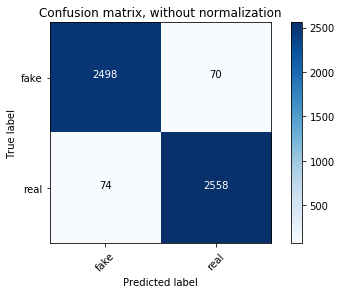

<Figure size 432x288 with 0 Axes>

In [81]:
    cm= confusion_matrix(  y_test,pred)  # doctest: +SKIP
    np.set_printoptions(precision=2)
    plot_confusion_matrix(cm, classes=['fake', 'real'],
                          title='Confusion matrix, without normalization')
    plt.figure()
    plt.show()

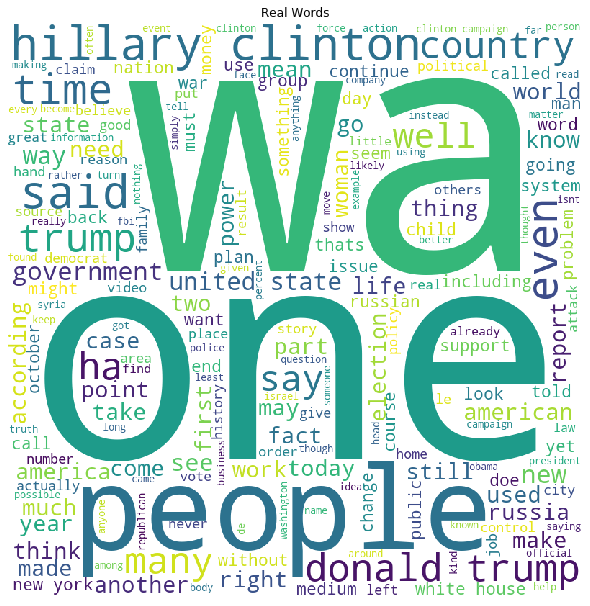

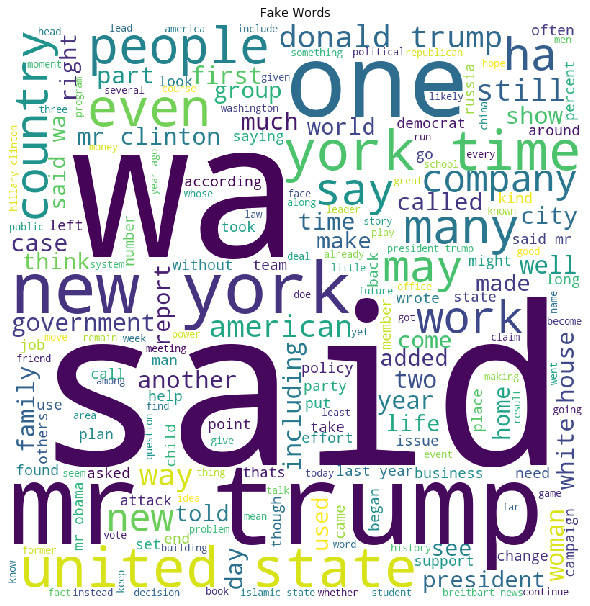

In [82]:
show_word_example(real_word,Combined_StopWords,"Real Words")
show_word_example(fake_word,Combined_StopWords,"Fake Words")


In [83]:
arr= ["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"]
arr=["From a single Tweeter with 35 friends to being shared over 400000 times through various forums this article traces a Tweet made November 9th 2016"]
arr=["Pizzagate was a fake news story which connected a pizzeria with a child pornography ring allegedly run by Hillary Clinton and John Podesta On Sunday December 3 2016 an armed shooter entered the pizzeria and fired a shot before being accosted by the police"]
arr=[" Ex-Assistant FBI Director: Clintons Are a Crime Family October   That's quite an endorsement . And if theres anything top FBI officials now, its crime families. Certainly this is probably the first serious level of experience that Hillary can claim in any field The Clintons, that’s a crime family, basically,” former assistant FBI director James Kallstrom said. It’s like organized crime. I mean the Clinton Foundation is a cesspool Kallstrom, best known for leading the investigation into the explosion of TWA flight 800 in the late 90s said that Hillary Clinton, the Democratic presidential nominee, was a “pathological liar.”  He also blasted Attorney General Loretta Lynch, claiming that she impeded the investigation into Clinton’s private server.  The problem here is this investigation was never a real investigation,” he said. “That’s the problem. They never had a grand jury empanelled, and the reason they never had a grand jury empanelled, I’m sure, is Loretta Lynch would not go along with that.”  Kallstrom also said that FBI Director James Comey and the rest of the FBI’s leadership were responsible for holding back the investigation, not the rest of the bureau.  The agents are furious with what’s going on, I know that for a fact,” he said.  But according to the media, the FBI investigating Hillary is the real crime." ]
ans = logreg.predict(TF_IDF.transform(arr))[0]
print(ans)
# 1 is real 
# 0 is fake


1
